In [190]:
from __future__ import absolute_import, division, print_function

from os import listdir
import xmltodict
import pandas
from StringIO import StringIO
%matplotlib inline
from tqdm import tqdm
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from praelexis_file_system_provider.data_access_layer import AzureBlobStorageDataAccessLayer
import PyPDF2
import subprocess
import shutil
import os

import pytesseract
from PIL import Image

### Connect to blob storage

In [142]:
blob_dal = AzureBlobStorageDataAccessLayer('devcapitecdata', 'Gt5z0EAAAm5ZETk//WBnRiQUZ9FDB/BmLmbx5ZPRtDwh6vxTDAB/XzLlM+m/epfnDYcZ8JDfMEGg1p9tBW0iFQ==', 'bank-statements', home_directory='drop/Documentum_line_files')

blob_dal.connect()
files = blob_dal.list(path='CI')

print ("Number of files: ", len(files))


Number of files:  8000


In [143]:

print(files[500].name)
print(files[501].name)


0f427a33-cbed-4673-a5d0-79dce1b8d45b.pdf
0f427a33-cbed-4673-a5d0-79dce1b8d45b_POCSTATEMENTSSTD_Capitec__19122017_022834_1154.xml


### Download random pdfs and their xml files

In [191]:
folderLoc = "./TestRandomExamples100/"

In [ ]:
import random
random.seed(1000)
numToTest = 3

for i in tqdm(range(numToTest)):
    randNum = int(len(files)/2.0*random.random())*2-10 
    
    while(files[randNum].name[-3:]!="pdf"):
        randNum-=1

    pdfName = files[randNum].directory + files[randNum].name
    
    matchString = files[randNum].name[:-4]
    #print(matchString)
    if matchString in files[randNum-1].name:
        #print(files[randNum].name," ",files[randNum-1].name)
        xmlName = files[randNum-1].directory + files[randNum-1].name
    else:
        #print ("Else")
        #print(files[randNum].name," ",files[randNum+1].name)
        xmlName = files[randNum+1].directory + files[randNum+1].name
    #print ("Downloading: ", pdfName , " and ", xmlName)
        
    stream = StringIO()
    blob_dal.get(pdfName, stream)
    with open (folderLoc+"Example"+str(i+1)+".pdf", 'w') as tmp:
      stream.seek (0)
      shutil.copyfileobj (stream, tmp)
    
    stream = StringIO()
    blob_dal.get(xmlName, stream)
    with open (folderLoc+"Example"+str(i+1)+".xml", 'w') as tmp:
      stream.seek (0)
      shutil.copyfileobj (stream, tmp)

100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


### Convert and test document 1 document

Command to generate boxes from tesseract

command = 'tesseract ./TestRandomExamples/testText.jpg ./TestRandomExamples/testText  batch.nochop makebox'

In [ ]:
import commands
import time
import glob

exampleNumber = 2

%env TESSDATA_PREFIX=/leptonica/tesseract/tessdata

pdfNames = glob.glob(folderLoc+"*.pdf")

fileName = pdfNames[exampleNumber-1]

start = time.time()
s=commands.getstatusoutput("convert -density 300 -units pixelsperinch "+str(fileName)+" -quality 100 "+str(fileName[:-4])+".tif")
print(s)
print("It took ",round(time.time()-start,2)," seconds to convert the pdf.")

start = time.time()
command = "tesseract "+str(fileName[:-4])+".tif "+str(fileName[:-4])+ " -l eng bazaar"
print("Command: ", command)
s=commands.getstatusoutput(command)
print(s)
print("It took ",round(time.time()-start), " to run tesseract on the tif file.")

s=commands.getstatusoutput("convert -density 300 -units pixelsperinch "+str(fileName)+" -quality 100 "+str(fileName[:-4])+".tif")
print(s)
print("It took ",round(time.time()-start,2)," seconds to convert the pdf.")
tifLoc = str(fileName[:-4])+".tif"
print("Deleting the tif file.")
s=commands.getstatusoutput("rm " + tifLoc)
print("Tif deleted. Please check.")

print("Done")

env: TESSDATA_PREFIX=/leptonica/tesseract/tessdata
(0, '')
It took  15.16  seconds to convert the pdf.
Command:  tesseract ./TestRandomExamples/Example2.tif ./TestRandomExamples/Example2 -l eng bazaar


### Convert and process all pdfs

The pdfs are first converted to tif files. The tif files are then sent through Tesseract. A text file is then generated for each pdf image with the estimated text found using Tesseract.

In [ ]:
#import commands
#s=commands.getstatusoutput("tesseract ./TestRandomExamples/Example1.tif ./TestRandomExamples/Example1 -l eng")
#print(s)

In [ ]:
import commands
import time
import glob

%env TESSDATA_PREFIX=/leptonica/tesseract/tessdata

pdfNames = glob.glob(folderLoc+"*.pdf")

print("Number of pdfs found: ",len(pdfNames))

for i in tqdm(range(len(pdfNames))):
    if !os.path.isfile(str(pdfNames[i][:-4])+".txt")
        start = time.time()
        tifLoc = str(pdfNames[i][:-4])+".tif"
        s=commands.getstatusoutput("convert -density 300 -units pixelsperinch "+str(pdfNames[i])+" -quality 100 "+tifLoc)
        print(s)
        print("It took ",round(time.time()-start,2)," seconds to convert the pdf.")

        start = time.time()
        command = "tesseract " + tifLoc + " "+str(pdfNames[i][:-4])+" -l eng"
        print("Command: ", command)
        s=commands.getstatusoutput(command)
        print(s)
        print("It took ",round(time.time()-start), " to run tesseract on the tif file.")

        print("Deleting the tif file.")
        s=commands.getstatusoutput("rm " + tifLoc)
        print("Tif deleted. Please check.")
print("Done")

  0%|          | 0/3 [00:00<?, ?it/s]

env: TESSDATA_PREFIX=/leptonica/tesseract/tessdata
Number of pdfs found:  3
(0, '')
It took  6.8  seconds to convert the pdf.
Command:  tesseract ./TestRandomExamples/Example1.tif ./TestRandomExamples/Example1 -l eng
(0, 'Tesseract Open Source OCR Engine v4.00.00alpha with Leptonica\nPage 1\nPage 2\nPage 3\nPage 4')
It took  49.0  to run tesseract on the tif file.
Deleting the tif file.


 33%|███▎      | 1/3 [00:55<01:51, 55.64s/it]

Tif deleted. Please check.
(0, '')
It took  17.22  seconds to convert the pdf.
Command:  tesseract ./TestRandomExamples/Example2.tif ./TestRandomExamples/Example2 -l eng


KeyboardInterrupt: 

### Test amount value errors

In [220]:
def getValues(fileName):
    f = open(txtNames[i],'r')
    values = []
    line = f.readline()
    while line:

        amountLen = 0
        valueLine = []
        for index,char in enumerate(line):
            if amountLen>0:
                if char == '0' or char == '1' or char == '2' or char == '3' or char == '4' or char == '5'or \
                char == '6' or char == '7' or char == '8' or char == '9' or char == ' ' or char == ',' or \
                char == '.' or char == '-' or char == '+':
                    amountLen+=1
                else:
                    if amountLen>1 and line[index-amountLen:index] != "R ":
                        amount = str(line[index-amountLen:index])
                        amount = amount.replace("R", "")
                        amount = amount.replace(",", "")
                        amount = amount.replace(" ", "")
                        amount = amount.replace(".", "")
                        valueLine.append(amount)
                        #print(amount)
                        if len(valueLine)==2:
                            break
                    amountLen = 0
                    
            if char == 'R' and amountLen==0 and (len(valueLine)>0 or line[index-1] == ' ' or index==0):
                amountLen = 1
        '''if amountLen>1 and line[index-amountLen:index] != "R ":
            amount = str(line[index-amountLen:index])
            amount = amount.replace("R", "")
            amount = amount.replace(",", "")
            amount = amount.replace(" ", "")
            amount = amount.replace(".", "")
            valueLine.append(amount)'''
        if len(valueLine)>0:
            print(valueLine)
            values.append(valueLine)
        line = f.readline()
    return values
    
def getResult(values):
    possibleAlt = 0.0
    right = 0.0
    total = 0
    skip = 0
    for base in range(1,len(values)):
        i = base# + skip
        try:
            if len(values[i])==2:
                if round(float(values[i][1])-float(values[i][0]),2) == round(float(values[i-1][len(values[i-1])-1]),2):
                    right+=1
                else:
                    skip += 1
                    #print("Wrong. Ans: ", float(values[i][1])," minus ",float(values[i][0])," must equal ",float(values[i-1][len(values[i-1])-1]), ". But true subtraction: ",round(float(values[i][1])-float(values[i][0]),2))
                total += 1
            #elif i>0 and len(values[i])==1 and len(values[i-1])!=2:
               # print("Here")
                #total += 1
                
        except:
            #print("Not a number.")
            total +=1
    
    return round(right/total,2) if total>0 else 0.0,total

In [221]:
import glob
txtNames = glob.glob(folderLoc+"*.txt")
print("Number of textfiles found: ",len(txtNames))
result = np.zeros(len(txtNames))
for i in tqdm(range(len(txtNames))):
    values = getValues(txtNames[i])
    
    res,total = getResult(values)
    result[i] = res
    print("File number: ",str(i+1))
    print("File name: ",txtNames[i])
    print("Number of values tested: ",total)
    print("Accuracy: ", res," out of 1.\n")

 29%|██▉       | 29/100 [00:00<00:00, 273.42it/s]

Number of textfiles found:  100
['109']
['830979', '831088']
['1500', '-150500']
['1520', '-152699']
['-10300', '517589']
['-36500', '481089']
['-40000', '441089']
['-26700', '414389']
['-20998', '393391']
['-2000', '391391']
['-26900', '364491']
['-1500', '362991']
['-1600', '361391']
['-1600', '359791']
['-1600', '358191']
['-20998', '337193']
['-5926', '331267']
['-1890', '329377']
['-21400', '307977']
['-16400', '291577']
['291877']
['-17398', '24179']
['294179']
['1500', '-150500143679']
['-7100', '136579']
['-3500', '133079']
['-3000', '130079']
['-3000', '127079']
['-10000', '117079']
['-11490', '105589']
['-52466', '53123']
['191043', '244166']
['-53629', '190537']
['-1000', '189537']
['-1000', '188537']
['-9999', '178538']
['-70900', '107638']
['30000', '137638']
['-16000', '121638']
['-6999', '114639']
['-499', '114140']
['-6500', '107640']
['-500', '107140']
['-1700', '105440']
['-1000', '104440']
['-14797', '89643']
['-35000', '54643']
['54643']
['-500', '54143']
['-500', '

100%|██████████| 100/100 [00:00<00:00, 256.10it/s]

['-500000', '71539']
['-44500', '27039']
['-263947', '-236908']
['-31298', '-268204']
['-142489', '-410695']
['-13000', '-42369']
['-4255', '-42795']
['-16688', '-444638']
['-15000', '-459638']
['-3500', '-463138']
['-28850', '-491988']
['-1500', '-493488']
['-1000', '-494488']
['-1000', '-495488']
['-1000', '-496488']
['-1000', '-497488']
['-1000', '-498488']
['-11500', '-509988']
['200000', '-309988']
['-1500', '-311488']
['-1000', '-312488']
['-6704', '-319192']
['-8999', '-328191']
['-32819']
['-5612475']
['5785447']
['000']
File number:  55
File name:  ./TestRandomExamples100/Example32.txt
Number of values tested:  93
Accuracy:  0.65  out of 1.

['600']
['668400', '669000']
['-300000', '369000']
['-25000', '344000']
['-55983', '288017']
['-61000', '227017']
['-670', '226347']
['-540', '225807']
['-147000', '78807']
['-18284', '60523']
['-30000', '30523']
['-8200', '22323']
['-12200', '10123']
['250000', '260123']
['-10000', '250123']
['-24523', '225600']
['-15100', '210500']
['-10

### Plot the results

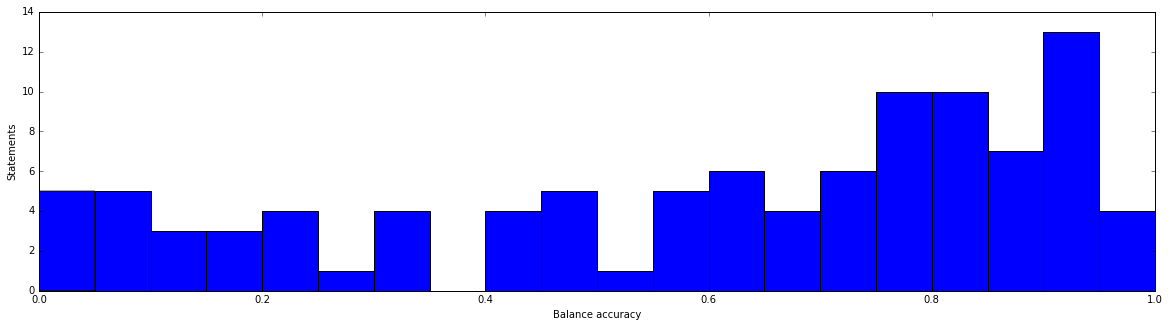

In [222]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = result#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJIAAAFHCAYAAAD6JmYkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAHOxJREFUeJzt3Xu0pWddH/DvLxkIuTADiM6YBBMgUFQMCA2yhNIRkJsItmgVVCSuKqtVQIsWse3KLJe3ZZetSMQajKkokYpxlWjFJFwGGyFibgQlXFQSEZyhMRBuIYTw6x9nJxyGzJxnzsw+79n7fD5rnZW93/Nefk/e8+7Ld57neau7AwAAAABrOWbqAgAAAABYDIIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhsw1SKqq86tqf1Vdt2rZL1XV9VV1bVVdVFXb51kDAAAAAEfHvHskXZDkqQcsuzTJ13f3I5N8IMnL51wDAAAAAEfBXIOk7r48yccOWPam7v7C7OkVSU6dZw0AAAAAHB1Tz5H0g0neOHENAAAAAAyYLEiqqv+U5PbuvnCqGgAAAAAYt22Kg1bVC5I8I8kT11ivN6QgAAAAgC2ku2s9221EkFSzn5UnVU9L8pNJntDdt621cbcsCTbanj17smfPnqnLgC3HtQfTcf3BNFx7MI2qdWVISeY8tK2qLkzy9iQPraq/r6qzk7wyyUlJLquqq6vqVfOsAQAAAICjY649krr7eXez+IJ5HhMAAACA+Zj6rm3AJrR79+6pS4AtybUH03H9wTRce7B4ajPPQVRVvZnrAwAAAFg0VbXuybb1SAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGDItqkLAAAAYGvatev07N9/49RlzM3Onadl374bpi4Djqrq7qlrOKiq6s1cHwAAAOtXVUmW+TtfxXdaNqOqSnfXerY1tA0AAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhcw2Squr8qtpfVdetWnbfqrq0qt5XVZdU1Y551gAAAADA0THvHkkXJHnqAct+KsmbuvufJXlLkpfPuQYAAAAAjoK5BkndfXmSjx2w+NlJfnv2+LeTfMc8awAAAADg6JhijqSv6u79SdLd+5J81QQ1AAAAAHCYtk1dQJI+1C/37Nlz1+Pdu3dn9+7dcy4HAAAAYHns3bs3e/fuPSr7qu5D5jhHfoCq05L8UXefOXt+fZLd3b2/qnYleWt3f+1Btu151wcAAMA0qipr9C1YcBXfadmMqirdXevZdiOGttXs504XJ3nB7PEPJHnDBtQAAAAAwBGaa4+kqrowye4kX5Fkf5JzkvzvJK9P8oAkNyb5N9398YNsr0cSAADAktIjCaZxJD2S5j607UgIkgAAAJaXIAmmsdmHtgEAAACwBARJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBk29QFAAAAAItl167Ts3//jVOXMTc7d56WfftumLqMTam6e+oaDqqqejPXBwAAwPpVVZJl/s5XWdbvtM7dYquqdHetZ1tD2wAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhkwWJFXVj1fVX1XVdVX12qq651S1AAAAALC2SYKkqjo5yYuSPKq7z0yyLcn3TFELAAAAAGO2TXjsY5OcWFVfSHJCko9MWAsAAAAAa5ikR1J3fyTJLyf5+yQfTvLx7n7TFLUAAAAAMGaqoW33SfLsJKclOTnJSVX1vClqAQAAAGDMVEPbnpzk77r75iSpqj9M8s1JLjxwxT179tz1ePfu3dm9e/fGVAgAwF127To9+/ffOHUZc7Nz52nZt++GqctgHfxtAqxt79692bt371HZV3X3UdnRYR206jFJzk9yVpLbklyQ5C+7+9cOWK+nqA8AgC9VVUmW+XNZxefOxeRvc7E5f4vLuVtsVZXurvVsO9UcSe9M8gdJrknyriSV5LwpagEAAABgzCQ9kkbpkQQAsDn4l2c2K3+bi835W1zO3WJbuB5JAAAAACweQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwZChIqqpfqqrtVXWPqnpzVf2/qvq+eRcHAAAAwOYx2iPpKd39iSTPTHJDkjOS/OS8igIAAABg8xkNku4x+++3JXl9d98yp3oAAAAA2KS2Da73R1X13iS3Jvl3VfWVST47v7K2hl27Ts/+/TdOXcbc7Nx5Wvbtu2HqMgDYJLzvwTSW/dpbfselqqYuAuAu1d1rr1R1XJITk9zS3XdU1YlJTuru/XMtrqpH6ltUK28Iy9u+pLLM5w+Aw+N9b7E5f4trK5w77Vtky98+ry2LannPXbJy/rp7XSn16NC2d3T3zd19R5J096eTvHE9BwQAAABgMR1yaFtV7UpySpLjq+obsxIXJ8n2JCfMuTYAAAAANpG15kh6apIXJDk1yX9btfyTSX56TjUBAAAAsAmNzpH0nO6+aAPqOfC45khaaMs9phSAw+N9b7E5f4trK5w77Vtky98+ry2LannPXXJkcyQdzmTbz0lyelb1Yurun1nPQUcJkhbdcl94ABwe73uLzflbXFvh3GnfIlv+9nltWVTLe+6SIwuS1hradqc3JLklyVVJblvPgQAAAABYbKNB0qnd/bS5VgIAAADApnbM4Hpvr6pvmGslAAAAAGxqo3MkvSfJGUk+mJWhbZWku/vMuRZnjqQFt9xjSgE4PN73Fpvzt7i2wrnTvkW2/O3z2rKolvfcJRszR9LT17NzAAAAAJbH0NC27r4xyQOSPHH2+DOj2wIAAACwHIbCoKo6J8nLkrx8tugeSX53XkUBAAAAsPmM9ir6V0meleTTSdLdH0ly73kVBQAAAMDmMxokfW4263UnSVWdOL+SAAAAANiMRoOk36+q30hyn6r6oSRvSvLq+ZUFAAAAwGZTo7ezq6pvTfKUrNyf8ZLuvmyehc2O2ct+uz23SwRgq/C+t9icv8W1Fc6d9i2y5W+f15ZFtbznLlk5f91d69r2cP7HVNX2JNvufN7dN6/noIdxPEHSQlvuCw+Aw+N9b7E5f4trK5w77Vtky98+ry2LannPXXJkQdLoXdteWFX7klyX5MokV83+u25VtaOqXl9V11fVX1fVNx3J/gAAAACYr21rr5Ik+YkkD+/um47isV+R5E+6+7uqaluSE47ivgEAAAA4ykaDpL9N8pmjddDZELl/0d0vSJLu/nySTxyt/QMAAABw9I0GSS9P8vaq+oskt925sLtfvM7jPjDJTVV1QZJHZGWY3Eu6+9YDV7zqqqvWeYjN7bjjjpu6BAAAAIDDMhok/UaStyR5d5IvHKXjPirJj3T3lVX1K0l+Ksk5B674uMc984sbbbt3tm2791E4/PRuvfX9U5cAAAAAbAF79+7N3r17j8q+hu7aVlXXdPc3HpUjruxvZ5J3dPeDZs8fn+Rl3f3tB6zXyzoL/I4du3PLLW/LsrZvxXLPcg/A4XF3l8Xm/C2urXDutG+RLX/7vLYsquU9d8kG3LUtyRur6oer6qur6n53/qzngEnS3fuTfKiqHjpb9KQk71nv/gAAAACYv9Ghbc+d/fflq5Z1kgcdwbFfnOS1VXWPJH+X5Owj2BcAAAAAczYUJHX3A4/2gbv7XUnOOtr7BQAAAGA+hoa2VdUJVfWfq+q82fOHVNUz19oOAAAAgOUxOkfSBUk+l+SbZ88/nORn51IRAAAAAJvSaJD04O7+pSS3J0l3fyYr0+sDAAAAsEWMBkmfq6rjM7u3X1U9OMltc6sKAAAAgE1n9K5te5L8aZIHVNVrkzwu7rIGAAAAsKWM3rXt0qq6KsljszKk7SXdfdNcKwMAAABgUxm9a9ubu/ufuvv/dPcfd/dNVfXmeRcHAAAAwOZxyB5JVXWvJCckuX9V3TdfnGB7e5JT5lwbAAAAAJvIWkPbXpjkx5KcnOSqfDFI+kSSc+dYFwAAAACbzCGDpO5+RZJXVNWLuvuVG1QTAAAAAJvQ6GTbr6yqhyf5uiT3WrX8NfMqDAAAAIDNZShIqqpzkuzOSpD0J0menuTyJIIkAAAAgC1i6K5tSb4zyZOS7Ovus5M8IsmOuVUFAAAAwKYzGiTd2t1fSPL5qtqe5KNJHjC/sgAAAADYbIaGtiW5sqruk+TVWbl726eSvGNuVQEAAACw6VR3H94GVacn2d7d182joAOO1cnh1bcoduzYnVtueVuWtX0rKof79wXA8qqqeN9bXM7f4toK5077Ftnyt89ry6Ja3nOXrJy/7q71bDs0tK2q3nzn4+6+obuvW70MAAAAgOV3yKFtVXWvJCckuX9V3TcrcXGSbE9yypxrAwAAAGATWWuOpBcm+bEkJ2dlbqQ7fTLJufMqCgAAAIDNZ60g6e1Jfj/Jd3b3K6vqB5I8J8kNSS6cc23ARHbtOj379984dRlzs3Pnadm374apywAAYOkdN5tLCJbHISfbrqqrkzy5u2+uqickeV2SFyV5ZJKv7e7vnGtxJttecMs9OdkyM3EeMA9eWxab87e4tsK5075Fpn2La5nblizz+0JyZJNtr9Uj6djuvnn2+LuTnNfdFyW5qKquXc8BAQAAAFhMa9217diqujNselKSt6z63VohFAAAAABLZK0w6PeSvK2qbkpya5L/myRVdUaSW+ZcGwAAAACbyCGDpO7+uap6c5KvTnJpf3GA4DFZmSsJAAAAgC1izeFp3X3F3Sx7/3zKAQAAAGCzWmuOJAAAAABIIkgCAAAAYJAgCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIZMGSVV1TFVdXVUXT1kHAAAAAGubukfSS5K8Z+IaAAAAABgwWZBUVacmeUaS35yqBgAAAADGTdkj6b8n+ckkPWENAAAAAAyaJEiqqm9Lsr+7r01Ssx8AAAAANrFtEx33cUmeVVXPSHJ8kntX1Wu6+/lfvuqeVY93z34AOJhdu07P/v03Tl3G3OzceVr27bth6jKApXNcqvzbJgDLae/evdm7d+9R2Vd1TzuyrKr+ZZKXdvez7uZ3vawj33bs2J1bbnlblrV9KypT/32xPisfpJf53C3336bzx2blb3OxbYXzt7ztW+a2Jdq36LRvcS1z25Kt8L7e3ev6F5Sp79oGAAAAwIKYamjbXbr7bUneNnUdAAAAAByaHkkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMCQbVMXwDI7LlU1dRFzsXPnadm374apy4AtymsLAABMRZDEHN2WpKcuYi7271/OL7GwGLy2AADAVAxtAwAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYMgkQVJVnVpVb6mqv66qd1fVi6eoAwAAAIBx2yY67ueT/IfuvraqTkpyVVVd2t3vnageAAAAANYwSY+k7t7X3dfOHn8qyfVJTpmiFgAAAADGTD5HUlWdnuSRSf5i2koAAAAAOJSphrYlSWbD2v4gyUtmPZPuxp5Vj3fPfmBqx6Wqpi4CAACAufCd72AmC5KqaltWQqTf6e43HHzNPRtUERyO25L01EXMkRdMAABgK/Od72CmHNr2W0ne092vmLAGAAAAAAZNEiRV1eOSfG+SJ1bVNVV1dVU9bYpaAAAAABgzydC27v7zJMdOcWwAAAAA1mfyu7YBAAAAsBgESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwZNvUBQBsvONSVVMXASwdry0AwPITJAFb0G1Jeuoi5sgXWZiG1xYAYPkZ2gYAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMGSyIKmqnlZV762q91fVy6aqAwAAAIAxkwRJVXVMknOTPDXJ1yd5blU9bIpaAAAAABgzVY+kxyT5QHff2N23J3ldkmdPVAsAAAAAA6YKkk5J8qFVz/9htgwAAACATWrb1AWsZfv2b5+6hLn47GffPXUJAAAAAIdlqiDpw0m+ZtXzU2fLvswnPvHHG1LQdGrqAuZsmdu3zG1LtG/Rad+iqlretq3QvsWmfYtrmduWaN+i077FtcxtS5a/fetT3b3xB606Nsn7kjwpyT8meWeS53b39RteDAAAAABDJumR1N13VNWPJrk0K/M0nS9EAgAAANjcJumRBAAAAMDimequbV+iqp5WVe+tqvdX1csOss6vVtUHquraqnrkRtcIy2ita6+qnldV75r9XF5V3zBFnbBsRt73ZuudVVW3V9W/3sj6YFkNfubcXVXXVNVfVdVbN7pGWEYDnzm3V9XFs+96766qF0xQJiydqjq/qvZX1XWHWOews5bJg6SqOibJuUmemuTrkzy3qh52wDpPT/Lg7n5Ikhcm+R8bXigsmZFrL8nfJXlCdz8iyc8mefXGVgnLZ/Dau3O9X0xyycZWCMtp8DPnjiS/luSZ3f3wJN+14YXCkhl83/uRJH/d3Y9M8i1JfrmqNv0dxmEBXJCVa+9urTdrmTxISvKYJB/o7hu7+/Ykr0vy7APWeXaS1yRJd/9Fkh1VtXNjy4Sls+a1191XdPcts6dXJDllg2uEZTTyvpckL0ryB0k+upHFwRIbufael+Si7v5wknT3TRtcIyyjkWuvk9x79vjeSf6puz+/gTXCUuruy5N87BCrrCtr2QxB0ilJPrTq+T/ky7+sHrjOh+9mHeDwjFx7q/3bJG+ca0WwNax57VXVyUm+o7t/Pe47C0fLyPveQ5Pcr6reWlV/WVXfv2HVwfIaufbOTfJ1VfWRJO9K8pINqg22unVlLboLAmuqqm9JcnaSx09dC2wRv5Jk9RwSwiTYGNuSPCrJE5OcmOQdVfWO7v6bacuCpffUJNd09xOr6sFJLquqM7v7U1MXBny5zRAkfTjJ16x6fups2YHrPGCNdYDDM3LtparOTHJekqd196G6RQJjRq69f57kdVVVSe6f5OlVdXt3X7xBNcIyGrn2/iHJTd392SSfrao/S/KIJIIkWL+Ra+/sJL+QJN39t1X1wSQPS3LlhlQIW9e6spbNMLTtL5OcUVWnVdU9k3xPkgM/KF+c5PlJUlWPTfLx7t6/sWXC0lnz2quqr0lyUZLv7+6/naBGWEZrXnvd/aDZzwOzMk/SvxciwREb+cz5hiSPr6pjq+qEJN+U5PoNrhOWzci1d2OSJyfJbH6Wh2blpi/AkascvHf7urKWyXskdfcdVfWjSS7NSrB1fndfX1UvXPl1n9fdf1JVz6iqv0ny6awk1sARGLn2kvyXJPdL8qpZz4jbu/sx01UNi2/w2vuSTTa8SFhCg58531tVlyS5LskdSc7r7vdMWDYsvMH3vZ9N8j9X3aL8P3b3zROVDEujqi5MsjvJV1TV3yc5J8k9c4RZS3X7fAoAAADA2jbD0DYAAAAAFoAgCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJABg06qqO6rq6qq6tqqurKrHDmzzyY2oDQBgK9o2dQEAAIfw6e5+VJJU1VOS/GKS3Wts0/MuakpVdWx33zF1HQDA1qRHEgCwmdWqxzuS3JwkVXViVb1p1kvpXVX1rC/b8CDrVNVpVfWeqjqvqv6qqv60qo6b/e7BVXXZqh5QD5wt/4mqeuds+Tl3W2jVq2brvHv1OlV1VlX9+WzbK2Z1HVNV/3W27rVV9SOzdT9YVfebPX50Vb119vicqnpNVV2e5DWzNvzZrMYv6alVVS+rquuq6pqq+vmqelBVXbXq92esfg4AcDj0SAIANrPjq+rqJMcn2ZXkibPltyb5ju7+VFV9RZIrklx8wLafPcQ6ZyT57u7+4ar6X0mek+TCJK9N8vPdfXFV3TPJMVX1rUke0t2PqapKcnFVPb67Lz/geD/d3R+vqmOSvLmqLkryviSvS/Jd3X11VZ00q+uHk5yW5Mzu7qq6z2wfB/amWv38a5M8rrs/V1X3SvLk2eMzkvxekrOq6ulJvj3JWd19W1XdZ1bTx6vqzO6+LsnZSX5r7f/1AABfTpAEAGxmn1k1tO2xSX4nycOz0qv6F6rqCUm+kOTkqvqq7v7oqm3r7taZ/e6D3f3u2eOrkpw+C3lO7u6Lk6S7Pzc77lOSfOss0KokJyZ5SJIDg6Tvqaofysrnq11Jvm62/CPdffVsn5+a7fPJSX69u3u2/OOraj6Yi++sKck9k5xbVY9McsesniR5UpILuvu2A/Z7fpKzq+qlSb47yVmHOA4AwEEJkgCAhdDdV1TV/avq/km+Lcn9k3xjd3+hqj6Y5F4HbPK9h1jntlXr3bFq+d0FOZXkF7r71QerrapOT/LSJI/u7k9U1QVr7PNgPp8vTj1wYHs+verxjyfZ191nVtWxWemhdSgXJTknyVuTXNndHzuMmgAA7mKOJABgM7srhKmqh2Xls8s/ZWW+pI/OAqJvycowsQO3GVnnLrPeQh+qqmfPjnfPqjo+ySVJfrCqTpwtP7mqvvKAzbcn+VSST1bVziRPny1/X5JdVfXo2bYnzYKfy5K8cPY4VXXf2fofTPLo2ePnHOL/y44k/zh7/Pwkx84eX5aVnkfHr97vrIfSJUl+PckFh9gvAMAhCZIAgM3sXlV1dVVdk5V5gJ4/Gw722qzMCfSuJN+X5PpV29w5r9DIOgd6fpIXz7b58yQ7u/uyrMyf9I6qui7J65OctHqj2dxD186O8buZDXvr7tuzMpTs3Kq6NsmlSY5L8ptJPpTkulnbnjvb1c8k+dWqemdWeicdzKuSvGC27UMz663U3ZdkZR6oK2dD8V66apvXZqX31aWH2C8AwCHVbGg+AABLbDY/0vbuvtu7zgEAjDBHEgDAkquqP0zyoHzxrncAAOuiRxIAAAAAQ8yRBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABD/j//WowQ0oxSqgAAAABJRU5ErkJggg==np.random.normal(size = 1000)
plt.figure(figsize=(20,5))
plt.hist(x, bins=20)
#plt.title('Balance accuracy of sample statements')
plt.xlabel('Balance accuracy')
plt.ylabel('Statements')

### Read the xml and output using pandas

In [171]:
import xml.etree.cElementTree as et
import pandas as pd
 
def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None
 
""" main """
path = './TestExamples/Example1.xml'
parsed_xml = et.parse(path)
dfcols = ['postdate', 'description','fee','payments','deposits','balance']
df_xml = pd.DataFrame(columns=dfcols)
child = parsed_xml.getroot().getchildren()[2].getchildren()
for node in child:
    postdate = node.find('postdate')
    description = node.find('description')
    fee = node.find('fee')
    payments = node.find('payments')
    deposits = node.find('deposits')
    balance = node.find('balance')

    df_xml = df_xml.append(
        pd.Series([getvalueofnode(postdate),
                   getvalueofnode(description),
                   getvalueofnode(fee),
                   getvalueofnode(payments),
                   getvalueofnode(deposits),
                   getvalueofnode(balance)], index=dfcols),
        ignore_index=True)

print df_xml

SyntaxError: invalid syntax (<ipython-input-171-09d5d5c399f4>, line 31)